# Importing libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import t
from scipy.stats import norm

# Understanding data

In [2]:
df=pd.read_csv('C:\\Users\\chint\\Downloads\\data.csv')
df

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,...,0,0.0,0,0.000,0,0,151.30,1,1525,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,...,0,0.0,0,0.000,0,0,1918.00,7,1516,0.5862
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,...,0,4088.0,0,0.000,0,0,820.00,7,0,0.8105
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,...,1,0.0,0,0.000,0,0,38.81,0,1515,0.5556
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,...,0,918.4,0,0.000,0,0,1721.00,5,0,0.6429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111737,4209703,43739241d6a8e8,afb7c87045825e,ad5719d2422207,0,0,70.31,0,0,0,...,0,0.0,0,0.000,0,0,799.80,2,0,0.3929
1111738,4311549,d57c8a22a9e38b,85e0624ddd2cb0,c3f50eef6dbb01,0,3,334.10,0,0,1,...,0,1549.0,0,0.000,0,0,2777.00,7,0,0.8542
1111739,3521011,c7ad131758ba55,b3759687b385b3,990a8d68ec2bc4,0,0,119.30,1,0,0,...,0,0.0,0,0.000,0,0,60.45,1,0,0.7174
1111740,2138826,8237d06ea2c508,13a05023ab7735,f93b1f0defaee5,1,4,53.51,1,0,7,...,1,3610.0,0,0.000,1,0,2209.00,4,0,0.9000


In [10]:
df.shape

(1111742, 30)

In [11]:
df.describe()

,Unnamed: 0,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,...,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111741e+06
mean,2.224362e+06,2.336738e-01,1.106655e+00,1.307364e+02,6.573612e-01,2.266488e-01,1.370348e+00,4.759562e+01,5.044301e+02,9.255097e-01,...,1.641784e-01,6.042142e+02,3.551184e-03,4.545068e+00,2.401097e-02,7.833652e-03,1.153282e+03,3.659685e+00,6.057065e+02,4.727868e-01
std,1.283879e+06,5.894028e-01,1.716050e+00,1.711755e+02,1.146023e+00,6.033356e-01,2.683819e+00,2.747025e+01,6.274006e+02,1.562216e+00,...,4.704189e-01,1.495949e+03,7.385452e-02,3.061857e+01,1.678909e-01,9.194621e-02,1.182788e+03,2.461805e+00,7.395140e+02,3.073771e-01
min,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.112440e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.552000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,2.223772e+06,0.000000e+00,0.000000e+00,8.411000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.841000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,3.337954e+06,0.000000e+00,2.000000e+00,1.859000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.171000e+03,1.000000e+00,...,0.000000e+00,7.927500e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.975000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,4.446964e+06,1.700000e+01,2.400000e+01,5.990000e+03,3.500000e+01,6.400000e+01,7.300000e+01,1.000000e+02,2.170000e+03,7.200000e+01,...,2.300000e+01,3.540000e+04,1.400000e+01,2.668000e+03,1.000000e+01,5.000000e+00,1.396000e+04,1.770000e+02,2.002000e+03,1.000000e+00


In [12]:
df.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,...,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,...,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,...,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,...,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,...,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


In [13]:
df.tail()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
1111737,4209703,43739241d6a8e8,afb7c87045825e,ad5719d2422207,0,0,70.31,0,0,0,...,0,0.0,0,0.000,0,0,799.80,2,0,0.3929
1111738,4311549,d57c8a22a9e38b,85e0624ddd2cb0,c3f50eef6dbb01,0,3,334.10,0,0,1,...,0,1549.0,0,0.000,0,0,2777.00,7,0,0.8542
1111739,3521011,c7ad131758ba55,b3759687b385b3,990a8d68ec2bc4,0,0,119.30,1,0,0,...,0,0.0,0,0.000,0,0,60.45,1,0,0.7174
1111740,2138826,8237d06ea2c508,13a05023ab7735,f93b1f0defaee5,1,4,53.51,1,0,7,...,1,3610.0,0,0.000,1,0,2209.00,4,0,0.9000
1111741,609836,9beb0064c56445,5cfa1834dc5b11,0406ce4ab7a1bd,5,3,607.40,3,0,3,...,0,713.9,0,8.912,0,0,3713.00,5,1611,1.0000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111742 entries, 0 to 1111741
Data columns (total 30 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1111742 non-null  int64  
 1   Id               1111742 non-null  object 
 2   groupId          1111742 non-null  object 
 3   matchId          1111742 non-null  object 
 4   assists          1111742 non-null  int64  
 5   boosts           1111742 non-null  int64  
 6   damageDealt      1111742 non-null  float64
 7   DBNOs            1111742 non-null  int64  
 8   headshotKills    1111742 non-null  int64  
 9   heals            1111742 non-null  int64  
 10  killPlace        1111742 non-null  int64  
 11  killPoints       1111742 non-null  int64  
 12  kills            1111742 non-null  int64  
 13  killStreaks      1111742 non-null  int64  
 14  longestKill      1111742 non-null  float64
 15  matchDuration    1111742 non-null  int64  
 16  matchType        1

In [15]:
df.columns

Index(['Unnamed: 0', 'Id', 'groupId', 'matchId', 'assists', 'boosts',
       'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace',
       'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'matchType', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

# EDA

# Univariate - Analysis of one variable

# Assists

In [27]:
df[df['assists'] == df['boosts'].max()]

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc


In [28]:
df[df['boosts'] == df['boosts'].min()]

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,...,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,...,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,...,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
5,2862125,e705cb7a4446ea,9d7180a567d020,b146588581df18,0,0,0.00,0,0,0,...,0,0.0,0,0.0,0,0,446.00,3,0,0.4946
6,365937,e253262031e08f,e5df2dcdaf3f4b,c1385ae84655e6,0,0,0.00,0,0,0,...,0,0.0,0,0.0,0,0,45.86,1,0,0.1939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111733,34444,e78e5ff96a9780,3f3e6497f02f15,dccb3ec00e243d,0,0,0.00,0,0,0,...,0,0.0,0,0.0,0,0,477.80,4,1467,0.2553
1111735,820792,49397c8362ea49,5396945f3be420,cf3a8317cd5e9d,0,0,0.00,0,0,0,...,0,0.0,0,0.0,0,0,75.83,1,1498,0.5909
1111736,4412080,a87134976177e4,b22d88e51a064b,175b0cabe633c0,0,0,0.00,0,0,0,...,0,0.0,0,0.0,0,0,31.01,2,0,0.0851
1111737,4209703,43739241d6a8e8,afb7c87045825e,ad5719d2422207,0,0,70.31,0,0,0,...,0,0.0,0,0.0,0,0,799.80,2,0,0.3929


Text(0, 0.5, 'number of players')

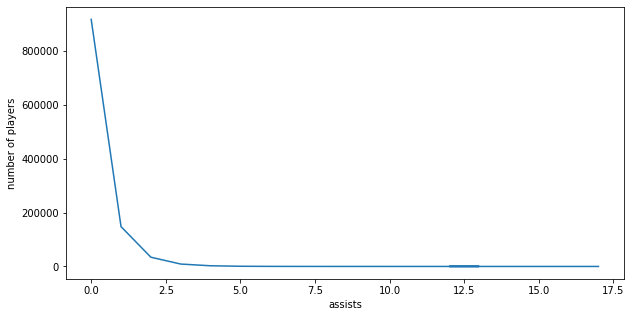

In [19]:
plt.figure(figsize=(10,5))
df['assists'].value_counts().plot.line()
plt.xlabel('assists')
plt.ylabel('number of players')

## conclusion: there are more than 800000 players with 0 assists.

# boosts

In [25]:
df[df['boosts'] == df['boosts'].max()]

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
16975,3979434,d16b329d5ea64f,ba50388b7256f1,57770aadb2235b,0,24,0.0,0,0,1,...,0,0.0,0,0.0,0,0,267.3,8,0,0.0


In [26]:
df[df['boosts'] == df['boosts'].min()]

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,...,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,...,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,...,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
5,2862125,e705cb7a4446ea,9d7180a567d020,b146588581df18,0,0,0.00,0,0,0,...,0,0.0,0,0.0,0,0,446.00,3,0,0.4946
6,365937,e253262031e08f,e5df2dcdaf3f4b,c1385ae84655e6,0,0,0.00,0,0,0,...,0,0.0,0,0.0,0,0,45.86,1,0,0.1939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111733,34444,e78e5ff96a9780,3f3e6497f02f15,dccb3ec00e243d,0,0,0.00,0,0,0,...,0,0.0,0,0.0,0,0,477.80,4,1467,0.2553
1111735,820792,49397c8362ea49,5396945f3be420,cf3a8317cd5e9d,0,0,0.00,0,0,0,...,0,0.0,0,0.0,0,0,75.83,1,1498,0.5909
1111736,4412080,a87134976177e4,b22d88e51a064b,175b0cabe633c0,0,0,0.00,0,0,0,...,0,0.0,0,0.0,0,0,31.01,2,0,0.0851
1111737,4209703,43739241d6a8e8,afb7c87045825e,ad5719d2422207,0,0,70.31,0,0,0,...,0,0.0,0,0.0,0,0,799.80,2,0,0.3929


Text(0, 0.5, 'number of players')

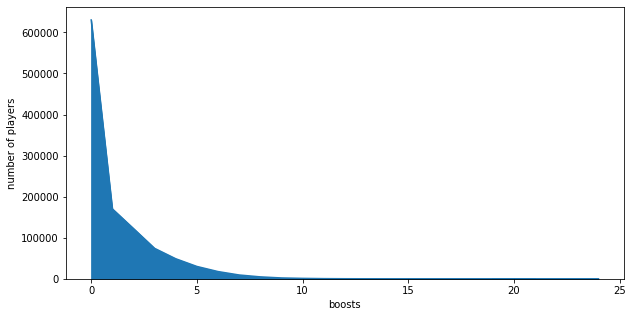

In [21]:
plt.figure(figsize=(10,5))
df['boosts'].value_counts().plot.area()
plt.xlabel('boosts')
plt.ylabel('number of players')

## conclusion: there are 600000 players who used 0 boosts  in a game of 100 players and there are less players who used boosts more than 20.

# damagedealt

In [25]:
df['damageDealt'].max()

5990.0

In [26]:
df['damageDealt'].min()

0.0

Text(0, 0.5, 'number of players')

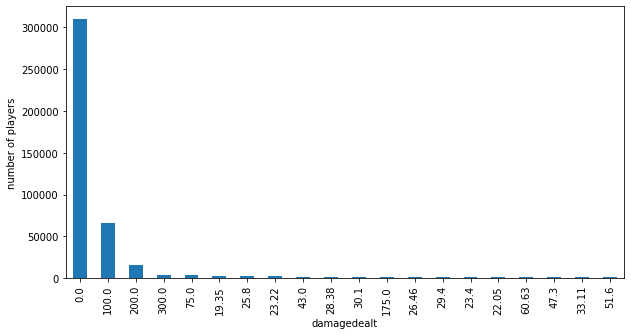

In [36]:
plt.figure(figsize=(10,5))
df['damageDealt'].value_counts().head(20).plot.bar()
plt.xlabel('damagedealt')
plt.ylabel('number of players')

## Conclusion: there are more than 300000 players who has damage score of 0.

# DBNOS - Number of enemy players knocked

In [44]:
df[df['DBNOs'] == df['damageDealt'].max()]

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc


In [45]:
df[df['DBNOs'] == df['DBNOs'].min()]

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,...,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,...,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,...,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,...,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,...,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111733,34444,e78e5ff96a9780,3f3e6497f02f15,dccb3ec00e243d,0,0,0.00,0,0,0,...,0,0.0,0,0.0,0,0,477.80,4,1467,0.2553
1111735,820792,49397c8362ea49,5396945f3be420,cf3a8317cd5e9d,0,0,0.00,0,0,0,...,0,0.0,0,0.0,0,0,75.83,1,1498,0.5909
1111736,4412080,a87134976177e4,b22d88e51a064b,175b0cabe633c0,0,0,0.00,0,0,0,...,0,0.0,0,0.0,0,0,31.01,2,0,0.0851
1111737,4209703,43739241d6a8e8,afb7c87045825e,ad5719d2422207,0,0,70.31,0,0,0,...,0,0.0,0,0.0,0,0,799.80,2,0,0.3929


Text(0, 0.5, 'number of players')

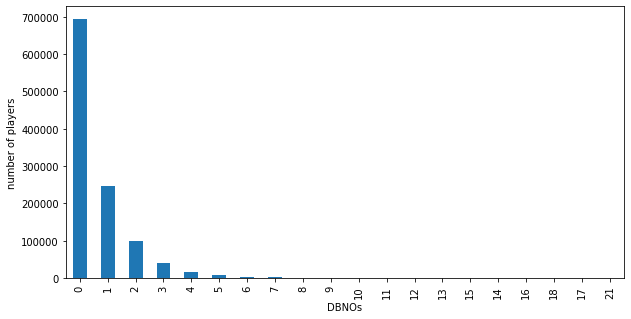

In [63]:
plt.figure(figsize=(10,5))
df['DBNOs'].value_counts().head(20).plot.bar()
plt.xlabel('DBNOs')
plt.ylabel('number of players')

## Conclusion: there are around 700000 players who knocked 0 enemy players 250000 players who knocked 1 enemy player.

# headshotkills

In [50]:
df[df['headshotKills'] == df['headshotKills'].max()]

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
758017,3431247,06308c988bf0c2,4c4ee1e9eb8b5e,6680c7c3d17d48,7,4,5990.0,0,64,10,...,0,0.0,0,0.0,0,0,728.1,35,0,1.0


In [49]:
df[df['headshotKills'] == df['headshotKills'].min()]

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,...,0,0.0,0,0.000,0,0,151.30,1,1525,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,...,0,0.0,0,0.000,0,0,1918.00,7,1516,0.5862
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,...,0,4088.0,0,0.000,0,0,820.00,7,0,0.8105
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,...,1,0.0,0,0.000,0,0,38.81,0,1515,0.5556
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,...,0,918.4,0,0.000,0,0,1721.00,5,0,0.6429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111737,4209703,43739241d6a8e8,afb7c87045825e,ad5719d2422207,0,0,70.31,0,0,0,...,0,0.0,0,0.000,0,0,799.80,2,0,0.3929
1111738,4311549,d57c8a22a9e38b,85e0624ddd2cb0,c3f50eef6dbb01,0,3,334.10,0,0,1,...,0,1549.0,0,0.000,0,0,2777.00,7,0,0.8542
1111739,3521011,c7ad131758ba55,b3759687b385b3,990a8d68ec2bc4,0,0,119.30,1,0,0,...,0,0.0,0,0.000,0,0,60.45,1,0,0.7174
1111740,2138826,8237d06ea2c508,13a05023ab7735,f93b1f0defaee5,1,4,53.51,1,0,7,...,1,3610.0,0,0.000,1,0,2209.00,4,0,0.9000


C:\Users\chint\anaconda3\envs\course\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'number of players')

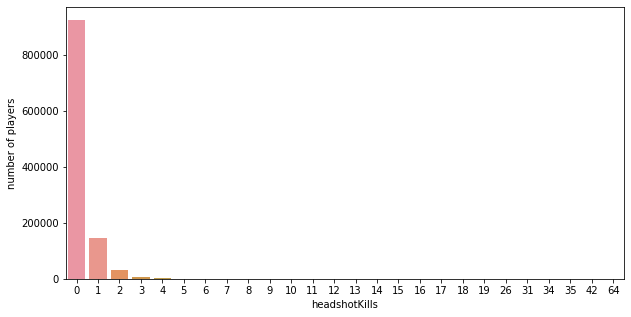

In [47]:
plt.figure(figsize=(10,5))
sns.countplot(df['headshotKills'])
plt.xlabel('headshotKills')
plt.ylabel('number of players')

## conclusion: there are more than 800000 players who have 0 head shots and around 100000 players who have 1 head shot kill.

# heals

In [53]:
df[df['heals'] == df['heals'].max()]

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
445620,3476343,1ac3c7d24475c8,ea7008368b4c5d,fcc78beee326e3,1,4,207.2,0,0,73,...,2,4677.0,0,0.0,0,0,3078.0,4,0,0.8889


In [52]:
df[df['heals'] == df['heals'].min()]

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,...,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,...,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,...,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,...,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
5,2862125,e705cb7a4446ea,9d7180a567d020,b146588581df18,0,0,0.00,0,0,0,...,0,0.0,0,0.0,0,0,446.00,3,0,0.4946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111733,34444,e78e5ff96a9780,3f3e6497f02f15,dccb3ec00e243d,0,0,0.00,0,0,0,...,0,0.0,0,0.0,0,0,477.80,4,1467,0.2553
1111735,820792,49397c8362ea49,5396945f3be420,cf3a8317cd5e9d,0,0,0.00,0,0,0,...,0,0.0,0,0.0,0,0,75.83,1,1498,0.5909
1111736,4412080,a87134976177e4,b22d88e51a064b,175b0cabe633c0,0,0,0.00,0,0,0,...,0,0.0,0,0.0,0,0,31.01,2,0,0.0851
1111737,4209703,43739241d6a8e8,afb7c87045825e,ad5719d2422207,0,0,70.31,0,0,0,...,0,0.0,0,0.0,0,0,799.80,2,0,0.3929


Text(0, 0.5, 'number of players')

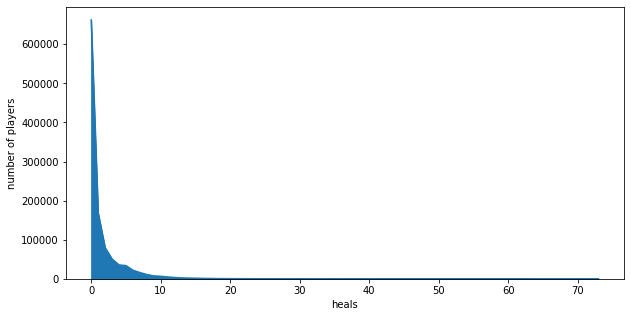

In [51]:
plt.figure(figsize=(10,5))
df['heals'].value_counts().plot.area()
plt.xlabel('heals')
plt.ylabel('number of players')

## conclusion: there are more than 600000 players who used 0 healings and only 1 player who used more than 70 healings in a  match.

# killpoints

In [57]:
df[df['killPoints'] == df['killPoints'].max()]

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
915436,1238356,292ae07aebd97b,211e041ce4a4bc,95ba6575eed0a3,3,1,355.0,1,0,0,...,0,0.0,0,0.0,0,0,208.8,3,1725,0.2857


In [56]:
df[df['killPoints'] == df['killPoints'].min()]

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,...,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,...,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429
5,2862125,e705cb7a4446ea,9d7180a567d020,b146588581df18,0,0,0.00,0,0,0,...,0,0.0,0,0.0,0,0,446.00,3,0,0.4946
6,365937,e253262031e08f,e5df2dcdaf3f4b,c1385ae84655e6,0,0,0.00,0,0,0,...,0,0.0,0,0.0,0,0,45.86,1,0,0.1939
7,3651102,c264a5ce0d4ca1,0efbbf391d7f62,b280791eb7a3fd,0,8,170.20,0,0,1,...,0,0.0,0,221.0,0,0,3297.00,5,0,0.9688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111736,4412080,a87134976177e4,b22d88e51a064b,175b0cabe633c0,0,0,0.00,0,0,0,...,0,0.0,0,0.0,0,0,31.01,2,0,0.0851
1111737,4209703,43739241d6a8e8,afb7c87045825e,ad5719d2422207,0,0,70.31,0,0,0,...,0,0.0,0,0.0,0,0,799.80,2,0,0.3929
1111738,4311549,d57c8a22a9e38b,85e0624ddd2cb0,c3f50eef6dbb01,0,3,334.10,0,0,1,...,0,1549.0,0,0.0,0,0,2777.00,7,0,0.8542
1111739,3521011,c7ad131758ba55,b3759687b385b3,990a8d68ec2bc4,0,0,119.30,1,0,0,...,0,0.0,0,0.0,0,0,60.45,1,0,0.7174


Text(0, 0.5, 'number of players')

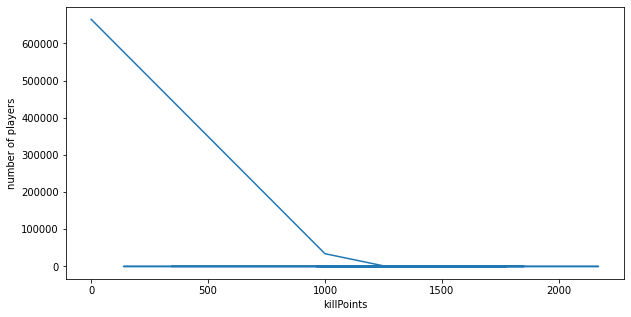

In [54]:
plt.figure(figsize=(10,5))
df['killPoints'].value_counts().plot.line()
plt.xlabel('killPoints')
plt.ylabel('number of players')

## conclusion: there are more than  600000 players who scored between 1000 and 1500 killpoints.

# kills

In [25]:
df['kills'].max()

72

In [26]:
df['kills'].min()

0

C:\Users\chint\anaconda3\envs\course\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'number of players')

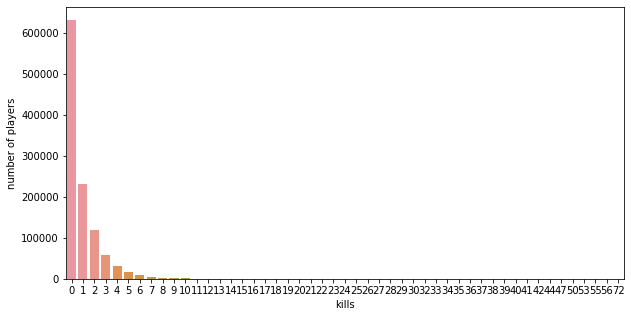

In [59]:
plt.figure(figsize=(10,5))
sns.countplot(df['kills'])
plt.xlabel('kills')
plt.ylabel('number of players')

## conclusion: there are more than 600000 players who killed 0 enemy players and around 200000 players who killed 1 enemy player.

# killStreaks

In [66]:
df['killStreaks'].max()

20

In [67]:
df['killStreaks'].min()

0

Text(0, 0.5, 'number of players')

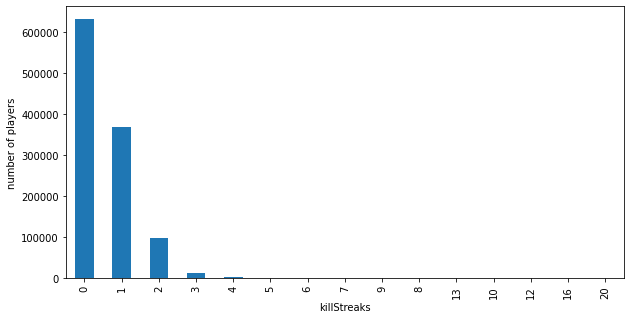

In [62]:
plt.figure(figsize=(10,5))
df['killStreaks'].value_counts().head(20).plot.bar()
plt.xlabel('killStreaks')
plt.ylabel('number of players')

## conclusion:when players are around 600000 there are 0 players who didn't got killed in short amount of time but when players got decreased the killstreak started to increase.

# matchDuration

In [47]:
df['matchDuration'].max()

2237

In [48]:
df['matchDuration'].min()

9

(array([5.00000e+00, 1.13000e+02, 6.52000e+02, 1.74100e+03, 1.94900e+03,
        1.80120e+05, 4.60012e+05, 8.06490e+04, 3.69765e+05, 1.67360e+04]),
 array([   9. ,  231.8,  454.6,  677.4,  900.2, 1123. , 1345.8, 1568.6,
        1791.4, 2014.2, 2237. ]),
 <BarContainer object of 10 artists>)

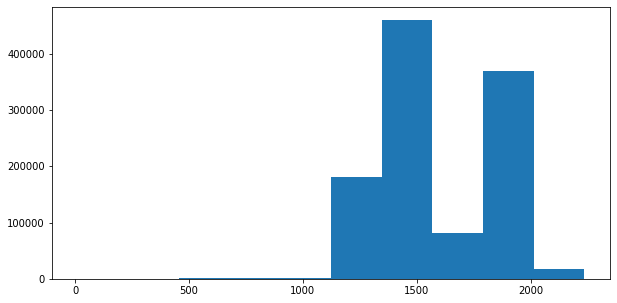

In [70]:
plt.figure(figsize=(10,5))
plt.hist(df['matchDuration'])

## conclusion: when the match duration is high more number of players are present in the match and as the duration got decreased there are less number of players in the match.

# matchType 

In [78]:
df['matchType'].max()

'squad-fpp'

In [79]:
df['matchType'].min()

'crashfpp'

<AxesSubplot:ylabel='matchType'>

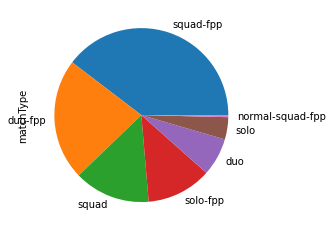

In [76]:
df['matchType'].value_counts().head(7).plot.pie()

## conclusion: there are more percent of players who play squad fpp than any other match types.

# revives

In [83]:
df['revives'].max()

23

In [84]:
df['revives'].min()

0

Text(0, 0.5, 'number of players')

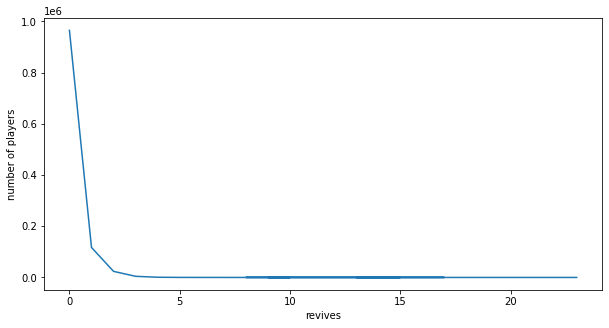

In [82]:
plt.figure(figsize=(10,5))
df['revives'].value_counts().plot.line()
plt.xlabel('revives')
plt.ylabel('number of players')

## conclusion: the highest number of revives in match is 23 and lowest is 0.

# Bivariate - Analysis of two variables

# longestkill according to matchtype

Text(0, 0.5, 'matchtype')

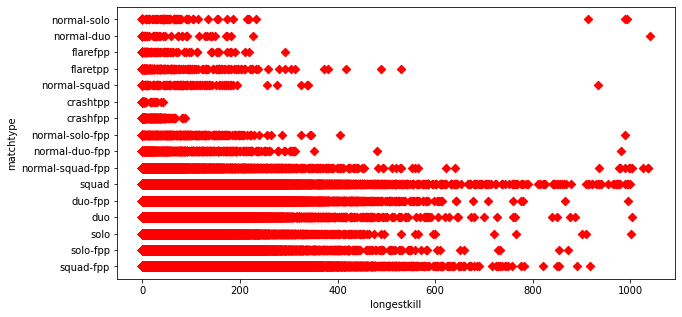

In [29]:
plt.figure(figsize=(10,5))
plt.scatter(x=df['longestKill'],y=df['matchType'],c='red',marker='D')
plt.xlabel('longestkill')
plt.ylabel('matchtype')

## conclusion: normal squad fpp has the longest kill.

# revives according to matchtype

<AxesSubplot:ylabel='None'>

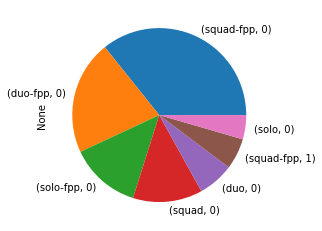

In [37]:
df[['matchType','revives']].value_counts().head(7).plot.pie()

## conclusion: the highest revives according to matchtype is 1.

# heals used according to matchtype

<AxesSubplot:xlabel='heals', ylabel='matchType'>

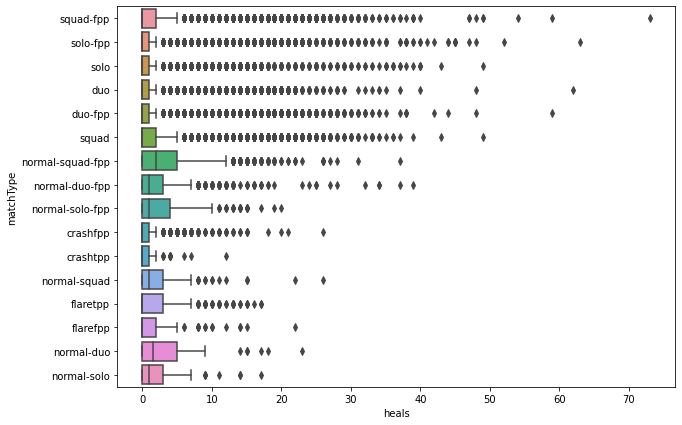

In [39]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='heals' , y='matchType',data=df)

## conclusion: there are more heals used in normal squad fpp and normal duo than any other matchetypes.

<AxesSubplot:xlabel='headshotKills,matchType'>

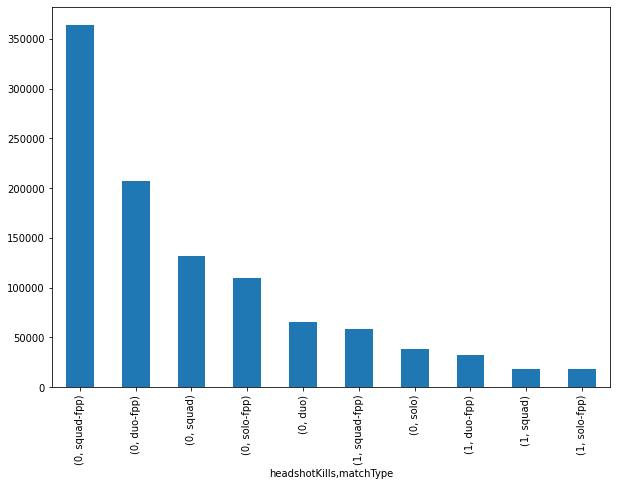

In [42]:
plt.figure(figsize=(10, 7))
df[['headshotKills','matchType']].value_counts().head(10).plot.bar()

## conclusion: there are more number of players who did not get headshot kill in squad fpp matchtype.

Text(0, 0.5, 'matchtype')

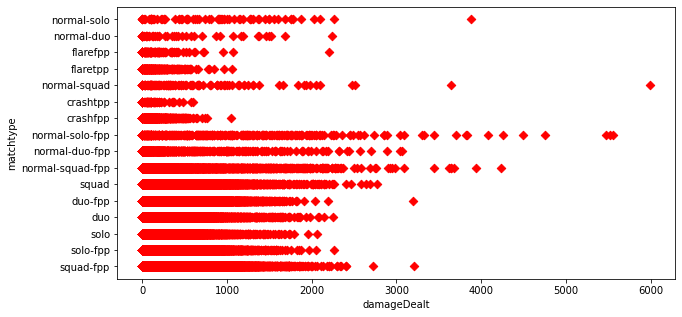

In [45]:
plt.figure(figsize=(10,5))
plt.scatter(x=df['damageDealt'],y=df['matchType'],c='red',marker='D')
plt.xlabel('damageDealt')
plt.ylabel('matchtype')

## conclusion: there is more damage done in normal squad  than any other matchtype.

# matchduartion according to matchtype

<AxesSubplot:xlabel='matchDuration', ylabel='matchType'>

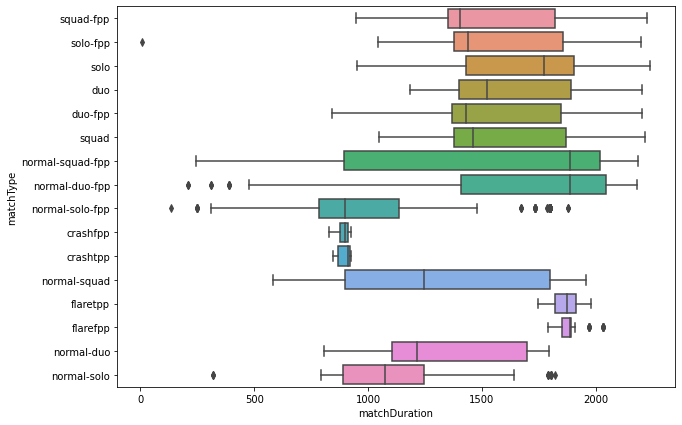

In [6]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='matchDuration' , y='matchType',data=df)

## conclusion: the match normal squad fpp and normal squad matchtypes have highest matchduration than other matches.

# Hypothesis testing

## PUBG tournament claims that on average the  highest number of kills according to all matchtypes is greater than 30.we are sceptic of their claims and does not believe that on single tournament one can not get more than 30 kills.

## Step 1: sample mean

In [10]:
l = [30, 33, 35, 45, 50, 37, 30, 41, 45, 30]

sample_mean = sum(l)/len(l)
print(sample_mean)

37.6


## Step 2: calculate standard deviation

In [15]:
sample_std = np.std(l)
print(sample_std)

6.902173570694959


## Step 3 : calculate t score

In [14]:
def t_score(sample_size, sample_mean, pop_mean, sample_std):
    numerator = sample_mean - pop_mean
    denomenator = sample_std / sample_size**0.5
    return numerator / denomenator

In [16]:
sample_size = 10
sample_mean = 37.6
pop_mean = 30
sample_std = 6.90

In [17]:
tscore = t_score(sample_size, sample_mean, pop_mean, sample_std)

print(tscore)

3.4830884372869115


## Step 4 : calculate critical value

In [18]:
alpha = 1 - 0.95

t_critical = t.ppf(1-alpha, df = 9)

print(t_critical)

1.8331129326536333


## Step 5 : plot the graph

Text(37.6, 0.1, 'x_bar')

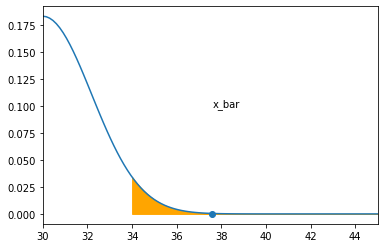

In [22]:
# Defining the x minimum and x maximum
x_min = 30.0
x_max = 45.0


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / (sample_size**0.5)


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the right critical value (Right tailed Test)
t_critical_right = pop_mean + (t_critical * std)


# Shading the right rejection region
x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

## Step 6 : t test

In [23]:
if(tscore > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


## Step 7 : p value test

In [24]:
p_value = 1.0 - t.cdf(np.abs(tscore), df=9)

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.0034524430860475297
Reject Null Hypothesis


## Conclusion : accept alternate hypothesis

## PUBG tournament claims that on average the highest damagedealt according to all matchtypes is lesser than 5990.we are sceptic of their claims and does not believe that on single tournament one can get more than 5990 damagescore.

## Step 1: sample mean

In [60]:
l = [5900, 5990, 5800, 5890, 5980, 5790, 5500, 5670, 5900, 5600]

sample_mean = sum(l)/len(l)
print(sample_mean)

5802.0


## Step 2: calculate standard deviation

In [61]:
sample_std = np.std(l)
print(sample_std)

156.06408939919524


## Step 3 : calculate t score

In [62]:
def t_score(sample_size, sample_mean, pop_mean, sample_std):
    numerator = sample_mean - pop_mean
    denomenator = sample_std / sample_size**0.5
    return numerator / denomenator

In [63]:
sample_size = 10
sample_mean = 5802.0 
pop_mean = 5990
sample_std = 156.0

In [64]:
tscore = t_score(sample_size, sample_mean, pop_mean, sample_std)

print(tscore)

-3.810950000715739


## Step 4 : calculate critical value

In [65]:
alpha = 1 - 0.95

t_critical = t.ppf(1-alpha, df = 9)

print(t_critical)

1.8331129326536333


## Step 5 : plot the graph

Text(5802.0, 0.02, 'x_bar')

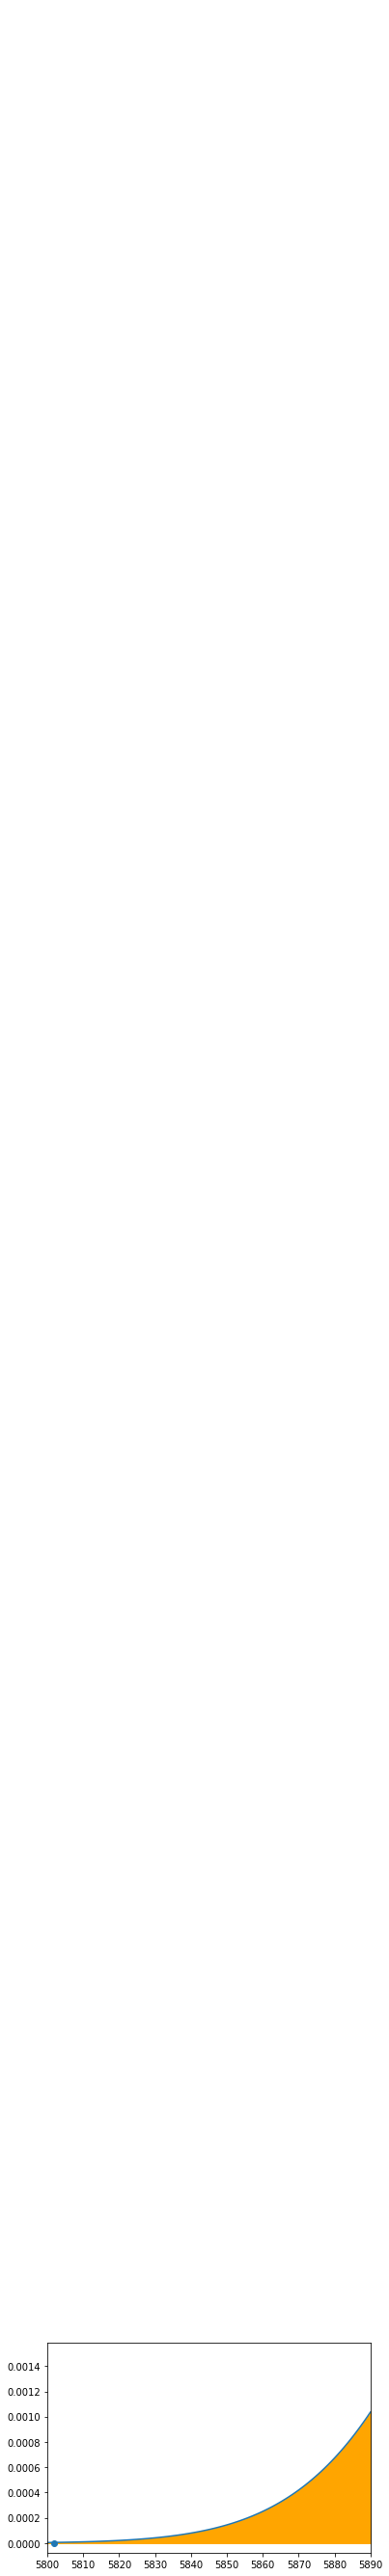

In [74]:
x_min = 5800
x_max = 5890

mean = pop_mean
std = sample_std / (sample_size**0.5)

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)

plt.xlim(x_min, x_max)
# plt.ylim(0, 0.03)

plt.plot(x, y)

t_critical_left = pop_mean + (-t_critical * std)

x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.02))

## Step 6 : t test

In [70]:
if(tscore < -t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


## Step 7 : p value test

In [71]:
p_value = 1.0 - t.cdf(np.abs(tscore), df=9)

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.002073537803476966
Reject Null Hypothesis


## Conclusion : accept alternate hypothesis

## PUBG tournament claims that each match duration is 2237 seconds.we are sceptic of their claims and does not believe that on tournament the duration can not be 2237 seconds.

## Step 1: sample mean

In [50]:
l = [2230, 2237, 2231, 2236, 2230, 2235, 2237, 2234, 2233, 2237]

sample_mean = sum(l)/len(l)
print(sample_mean)

2234.0


## Step 2: calculate standard deviation

In [51]:
sample_std = np.std(l)
print(sample_std)

2.7202941017470885


## Step 3 : calculate t score

In [52]:
def t_score(sample_size, sample_mean, pop_mean, sample_std):
    numerator = sample_mean - pop_mean
    denomenator = sample_std / sample_size**0.5
    return numerator / denomenator

In [53]:
sample_size = 10
sample_mean = 2234.0
pop_mean = 2237
sample_std = 2.72

In [54]:
tscore = t_score(sample_size, sample_mean, pop_mean, sample_std)

print(tscore)

-3.4878062428327716


## Step 4 : calculate critical value


In [55]:
alpha = 1 - 0.95

t_critical = t.ppf(1-alpha/2, df = 9)

print(t_critical)

2.2621571627409915


## Step 5 : plot the graph

Text(2234.0, 0.0007, 'x_bar')

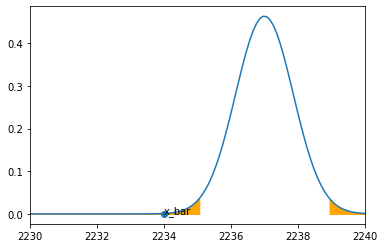

In [57]:
x_min = 2230
x_max = 2240


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / sample_size**0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the left and right critical values (Two tailed Test)
t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)


# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='orange')


# Ploting the sample mean and concluding the res
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))

## Step 5 : t test

In [58]:
if(np.abs(tscore) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


## Step 6 : calculate p value

In [59]:
p_value = 2 * (1.0 - t.cdf(np.abs(tscore), df=9))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.006853780070301685
Reject Null Hypothesis


## Conclusion :accept alternate hypothesis


# Final Conclusion:
# 1.normal squad fpp has the longest kill.
# 2.there are more heals used in normal squad fpp and normal duo than any other matchetypes.
# 3.there is more damage done in normal squad than any other matchtype.
# 4.the highest number of revives in tournament is 23 and lowest is 0.